# **Lending Case Study**
Import all necessary libraries required for data analysis

In [4]:
#Numerical and data analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Extra
import math
import warnings
warnings.filterwarnings('ignore')

#### Data Loading
<p> In this step, we load the dataset file to read the data and create a dataframe.

In [5]:
# As dataset file is in csv format, we are using read_csv() to read data.
loan_dataset = pd.read_csv('loan.csv')

# Displaying first 5 rows data
loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Data understanding
<p> In this step, we will start understanding the given loan dataset. </br> Understand the columns from data dictionary provided.

In [6]:
# Checking dataset shape

loan_dataset.shape

(39717, 111)

<p> By checking the shape of dataset we can say that initially there are 39717 rows and 111 columns

In [7]:
# Checking metadata of the dataset

loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#### Data Cleaning

<p> This is the important step in analysing the dataset.<br/> Initially we can observe that there are multiple rows and columns with NaN/Null values. Such columns and rows may not be useful or important for further analysis, so its better to get rid of them.
    
<p> There are huge number of columns with Null values. We are checking it with <b>isnull()</b> and calculating the percentage of missing values present.    

In [8]:
#checking % of missing values present in the dataset

perct = 100 * loan_dataset.isnull().mean()
perct

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

<p> By calculating the percentage of missing values using above formula, we can see many columns have 100% of Null values which is not at all useful for analysis.So we can drop those columns without any second thought.<br/>
We can also drop the columns if they have missing values in range of 40-50% based on analysing if that columns is important for getting meaning insights from data.<br/>
<p> Here we are listing all the columns which has more than 50% of missing values

In [9]:
drop_cols = perct[perct>50].index
drop_cols

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

<p> Lets drop all the columns which has more than 50% of missing values by looping through the columns list created in above step.

In [10]:
for i in drop_cols:
    loan_dataset.drop(i,axis=1,inplace=True)

loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [11]:
loan_dataset.shape

(39717, 54)

<p> After dropping the columns with more than 50% missing values, we can see the current shape of dataset.<br/> Now there are <b>54 columns</b> instead of <b><i>111 columns</i></b>. It means approx 50% of the total columns were having Null/NaN values.<br/>
    
<p> In next step, we are sorting the columns in descending order of the % of missing values still present in datasets.<br/>     

In [12]:
100*loan_dataset.isnull().mean().sort_values(ascending=False)

desc                          32.585543
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
total_rec_prncp                0.000000
out_prncp                      0.000000
initial_list_status            0.000000
out_prncp_inv                  0.000000
total_acc                      0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
collection_recovery_fee        0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
pub_rec                        0.000000
last_pymnt_amnt                0.000000
policy_code                    0.000000


<p> After doing further analysis based on data understanding document, we found that few columns will not be useful for drawing any conclusion on dataset.<br/> In this step, those irrelevant columns were identified and dropped.

In [13]:
drop_unwanted_cols = ['collection_recovery_fee', 'pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
                       'application_type', 'tax_liens','acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'url', 'desc',
                        'title', 'id', 'member_id', 'last_pymnt_amnt', 'last_pymnt_d','last_credit_pull_d','out_prncp',
                       'revol_util','out_prncp_inv','total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee',
                       'total_rec_prncp','url']

In [14]:
loan_dataset.drop(drop_unwanted_cols, axis = 1, inplace = True)

In [15]:
loan_dataset.shape

(39717, 29)

<p> After dropping all missing value columns and irrelevant columns which are not useful for analysis, dataset is left with <b>29 columns</b> in total.<br/>
<p> Dropping some more columns which has similar kind of data.

In [16]:
loan_dataset[['loan_amnt', 'funded_amnt',  'funded_amnt_inv']].corr()

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.981578,0.940034
funded_amnt,0.981578,1.000000,0.958422
funded_amnt_inv,0.940034,0.958422,1.000000


In [17]:
loan_dataset.drop(['funded_amnt','funded_amnt_inv'], axis=1 , inplace=True)

In [18]:
loan_dataset.shape

(39717, 27)

# Dropping Rows

The rows where **loan_status=Current** are the data where the loan repayment is currently in progress.<br/>The loans which are currently in progress will not contribute to decisions

In [19]:
total_rows = len(loan_dataset)
loan_dataset = loan_dataset[loan_dataset['loan_status'] != "Current"]

In [20]:
final_rows = len(loan_dataset)

print("Number of Rows dropped where loan_status = 'Current' : ",(total_rows-final_rows))
print("Percentage of rows dropped ", round((total_rows - final_rows)/total_rows*100,2),"%")

Number of Rows dropped where loan_status = 'Current' :  1140
Percentage of rows dropped  2.87 %


In [21]:
loan_dataset.shape

(38577, 27)

# Data Conversion

In [22]:
#Converting int_rate to float
loan_dataset['int_rate'] = loan_dataset.int_rate.apply(lambda x:float(x[:-1]))

#Converting int_rate to float
loan_dataset['annual_inc'] = loan_dataset.annual_inc.apply(lambda x:float(x))

# Converting term column to integer by striping month string.
loan_dataset['term'] = loan_dataset['term'].apply(lambda x : int(x[:-7]))

# Converting emp_length to integer values
# Converting emp_length as numerical data to create more effective statistical analysis as compared to nominal values
loan_dataset['emp_length'] = loan_dataset['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3,
                                                         '7 years': 7, '4 years': 4, '5 years': 5,
                                                         '1 year': 1, '6 years': 6, '8 years': 8,
                                                         '9 years': 9,  '10+ years': 10})
# Rounding the value of total_pymnt to 2 decimal points
loan_dataset['total_pymnt']= round( loan_dataset['total_pymnt'], 2)


#### Extracting information from existing columns and deriving new columns

In [23]:
loan_dataset['issued_year']= pd.to_datetime(loan_dataset.issue_d,format='%b-%y').dt.year
loan_dataset['issued_month']= pd.to_datetime(loan_dataset.issue_d,format='%b-%y').dt.month
loan_dataset['earliest_cr_year']= pd.to_datetime(loan_dataset.earliest_cr_line,format='%b-%y').dt.year
loan_dataset['earliest_cr_month']= pd.to_datetime(loan_dataset.earliest_cr_line,format='%b-%y').dt.month
# Creating new column as loan_defaulter from existing loan_status by converting Charged off records as 1 and fully paid as 0 for better analysis.
loan_dataset['loan_defaulter']= loan_dataset.loan_status.apply(lambda x: 1 if x== 'Charged Off' else 0)

In [24]:
# creating bins for columns which will be used for analysing continuous columns

# Bucketting Months to quarters
def issued_month_bin(column):
    if column < 4:
        return 'Q1'
    elif (column >= 4) and (column < 7):
        return 'Q2'
    elif (column >= 7) and (column < 9):
        return 'Q3'
    else:
        return 'Q4' # 75% quartile

loan_dataset['issued_month_bin'] = loan_dataset.apply(lambda x : issued_month_bin(x['issued_month']), axis = 1)

# Bucketting Loan Amount
def loan_amnt_bin(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan_dataset['loan_amnt_bin'] = loan_dataset.apply(lambda x : loan_amnt_bin(x['loan_amnt']), axis = 1)

# Bucketing Annual Income
def annual_inc_bin(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan_dataset['annual_inc_bin'] = loan_dataset.apply(lambda x: annual_inc_bin(x['annual_inc']), axis = 1)

# Bucketing interest rate
def int_rate_bin(column):
    if column <= 9:
        return '0-9%' # 25% quartile
    elif (column >9) and (column <= 11):
        return '9-11%'
    elif (column >11) and (column <= 13):
        return '11-13%'
    elif (column >13) and (column <= 15):
        return '13-15%'
    else:
        return '>15%' # 75% quartile

loan_dataset['int_rate_bin'] = loan_dataset.apply(lambda x : int_rate_bin(x.int_rate), axis = 1)

# Bucketing dti
def dti_bin(column):
    if column <= 8:
        return '0.0-8.0' # 25% quartile
    elif (column >8) and (column <= 12):
        return '8.0-12.0'
    elif (column >12) and (column <= 16):
        return '12.0-16.0'
    elif (column >16) and (column <= 20):
        return '16.0-20.0'
    else:
        return '>20.0' # 75% quartile

loan_dataset['dti_bin'] = loan_dataset.apply(lambda x : dti_bin(x.dti), axis = 1)

In [25]:
# As we have extracted data, columns like issue_d and earliest_cr_line can be dropped.
loan_dataset.drop(['issue_d', 'earliest_cr_line'], axis=1, inplace=True)

In [26]:
100 * loan_dataset.isnull().mean()

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.185033
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
total_pymnt             0.000000
recoveries              0.000000
pub_rec_bankruptcies    1.806776
issued_year             0.000000
issued_month            0.000000
earliest_cr_year        0.000000
earliest_cr_month       0.000000
loan_defaulter          0.000000
issued_mon

In [27]:
rows_before_drop = len(loan_dataset)
# Drop rows with empty values in this scenario
# Since the percent of rows is very small, dropping the rows instead of imputing them
loan_dataset = loan_dataset[loan_dataset['emp_length'].notna()]
loan_dataset = loan_dataset[loan_dataset['pub_rec_bankruptcies'].notna()]
loan_dataset = loan_dataset[loan_dataset['emp_title'].notna()]
rows_after_drop = len(loan_dataset)
print("Number of Rows dropped: ",(rows_before_drop-rows_after_drop))
print("Percentage of rows dropped: ", round((rows_before_drop - rows_after_drop)/rows_before_drop*100,2),"%")


Number of Rows dropped:  3095
Percentage of rows dropped:  8.02 %


In [28]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35482 entries, 1 to 39680
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             35482 non-null  int64  
 1   term                  35482 non-null  int64  
 2   int_rate              35482 non-null  float64
 3   installment           35482 non-null  float64
 4   grade                 35482 non-null  object 
 5   sub_grade             35482 non-null  object 
 6   emp_title             35482 non-null  object 
 7   emp_length            35482 non-null  float64
 8   home_ownership        35482 non-null  object 
 9   annual_inc            35482 non-null  float64
 10  verification_status   35482 non-null  object 
 11  loan_status           35482 non-null  object 
 12  purpose               35482 non-null  object 
 13  zip_code              35482 non-null  object 
 14  addr_state            35482 non-null  object 
 15  dti                   35

In [29]:
100 * loan_dataset.isnull().mean()

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
loan_status             0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
delinq_2yrs             0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
total_acc               0.0
total_pymnt             0.0
recoveries              0.0
pub_rec_bankruptcies    0.0
issued_year             0.0
issued_month            0.0
earliest_cr_year        0.0
earliest_cr_month       0.0
loan_defaulter          0.0
issued_month_bin        0.0
loan_amnt_bin           0.0
annual_inc_bin          0.0
int_rate_bin            0.0
dti_bin                 0.0
dtype: float64

# Segmentation

Eventhough this step is optional, for making the data analysis easy, this step can be very useful. We seggregate the columns based on the information provided. We can categorize columns data into different types like categorical, numerical etc.

In [30]:
# Getting the count of unique values in columns.
loan_dataset.nunique().sort_values(ascending=False)

total_pymnt             32721
emp_title               27506
revol_bal               20367
installment             14067
annual_inc               4842
recoveries               3642
dti                      2842
loan_amnt                 848
zip_code                  805
int_rate                  334
total_acc                  79
earliest_cr_year           51
addr_state                 49
open_acc                   38
sub_grade                  35
purpose                    14
earliest_cr_month          12
issued_month               12
emp_length                 11
delinq_2yrs                11
inq_last_6mths              9
grade                       7
annual_inc_bin              6
pub_rec                     5
issued_year                 5
int_rate_bin                5
dti_bin                     5
home_ownership              4
issued_month_bin            4
loan_amnt_bin               4
pub_rec_bankruptcies        3
verification_status         3
term                        2
loan_statu

In [31]:
categorical_col = ['term','loan_status','verification_status','home_ownership','purpose','grade','emp_length','pub_rec','pub_rec_bankruptcies','issued_year','issued_month','sub_grade']
continuous_col = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'total_pymnt','dti']

# Common Functions

In [32]:
# This function creates a dictionary of outliers which includes the inter quartile range, lower and upper bound for a particular column.
# Formulaes used in this analysis
# IQR = 75th Quartile - 25th Quartile
# Lower Bound = 25th Quartile - 1.5 * IQR
# Upper Bound = 75th Quartile + 1.5 * IQR

def get_IQR(df, column):
    quar25 = df[column].quantile(0.25)
    quar75 = df[column].quantile(0.75)
    iqr = quar75 - quar25
    lower_bound = quar25 - 1.5 * iqr
    upper_bound = quar75 + 1.5 * iqr
    return {'quartile1': quar25, 'quartile3': quar75, 'iqr': iqr, 'lower_bound': lower_bound, 'upper_bound': upper_bound}


# The function treat outliers, prints a box plot for each column under consideration
# Boxplot 1 = Before outlier treatment
# Boxplot 2 = After outlier treatment
# Also prints statistics of how many rows and percentage of rows dropped
def outlier_comparison(df, column):
    # box plot before dropping outliers
    fig, p = plt.subplots(1,2,figsize=(14, 3))
    bxplot1 = sns.boxplot(df[column], ax=p[0], orient="h")
    bxplot1.set_title('Plot ['+ column + '] - Original')
    new_df = df[df[column] < get_IQR(df, column)['upper_bound']]
    # box plot after dropping outliers
    bxplot2 = sns.boxplot(new_df[column], ax=p[1], orient="h")
    bxplot2.set_title('Plot [' + column + '] - After Outlier Treatment')
    plt.tight_layout()
    plt.show()

# The function drops the outliers based on the inter Quartile range and returns
# the updated dataframe.
def drop_outlier(df, column):
    prev_rows = len(df)
    new_df = df[df[column] < get_IQR(df, column)['upper_bound']]
    new_rows = len(new_df)
    print('Rows dropped: ', prev_rows - new_rows)
    print('Percentage rows dropped: ', round((prev_rows - new_rows)/prev_rows*100,2), "%")
    return new_df

In [33]:
# Function to convert string into percentage format. To be used during display of piecharts.
def pct_fmt(x):
  return '{:.2f}%'.format(x)

#Funtion to display a piechart based on column name.
def display_piechart(colname):
  labels = dict(loan_dataset[colname].value_counts()).keys()
  if len(labels) < 5:
    plt.figure(figsize=(7,7))
  else:
    plt.figure(figsize=(12,12))
  if len(labels) > 10:
    labels = (loan_dataset[colname].value_counts(normalize=True).index)[:10]
    values = (loan_dataset[colname].value_counts(normalize=True).values)[:10]
  else:
    values = loan_dataset[colname].value_counts().values
  explode = [0.02 for i in range(len(labels))]
  plt.pie(values, explode=explode ,autopct=pct_fmt, textprops={'fontsize': 13})
  plt.legend(labels)
  plt.show()

# Function for bivariate analysis
def bivariate_analysis(df,column,hue=None):
    fig, ax = plt.subplots(figsize=(4,5))
    ax = sns.countplot(data=df,x=column,hue=hue)
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.show()


# Treating Outliers



In [34]:
loan_dataset[continuous_col].describe([0.1, 0.25, 0.50, 0.75, 0.9, 0.95])

,loan_amnt,int_rate,installment,annual_inc,total_pymnt,dti
count,35482.000000,35482.000000,35482.000000,3.548200e+04,35482.000000,35482.000000
mean,11120.439237,11.992084,323.715563,6.902437e+04,11990.953188,13.397194
std,7327.883153,3.703821,207.177570,6.392552e+04,8821.931976,6.638803
min,500.000000,5.420000,16.080000,4.000000e+03,0.000000,0.000000
10%,3200.000000,7.140000,100.400000,3.000000e+04,3002.208000,4.200000
25%,5500.000000,8.940000,167.730000,4.124625e+04,5590.590000,8.310000
50%,10000.000000,11.860000,280.010000,6.000000e+04,9831.875000,13.500000
75%,15000.000000,14.540000,426.465000,8.230000e+04,16276.472500,18.640000
90%,21600.000000,16.820000,618.712000,1.150000e+05,24288.217000,22.360000
95%,25000.000000,18.390000,752.839000,1.400000e+05,29767.613500,23.830000


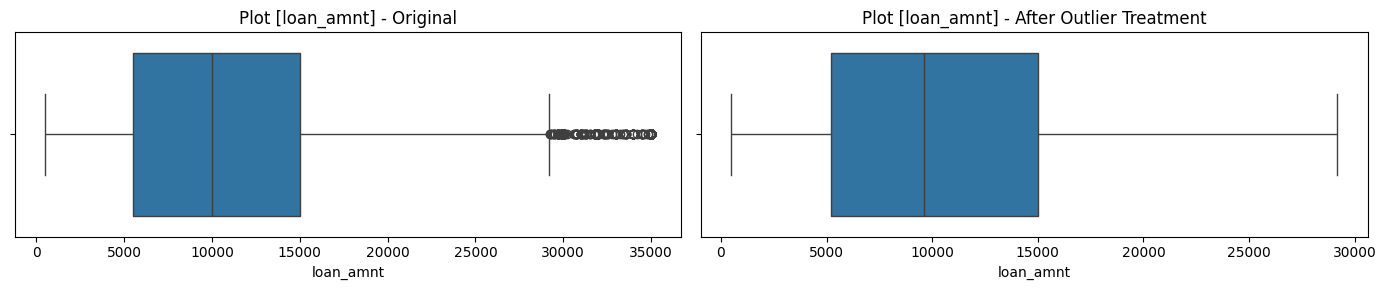

Rows dropped:  1010
Percentage rows dropped:  2.85 %


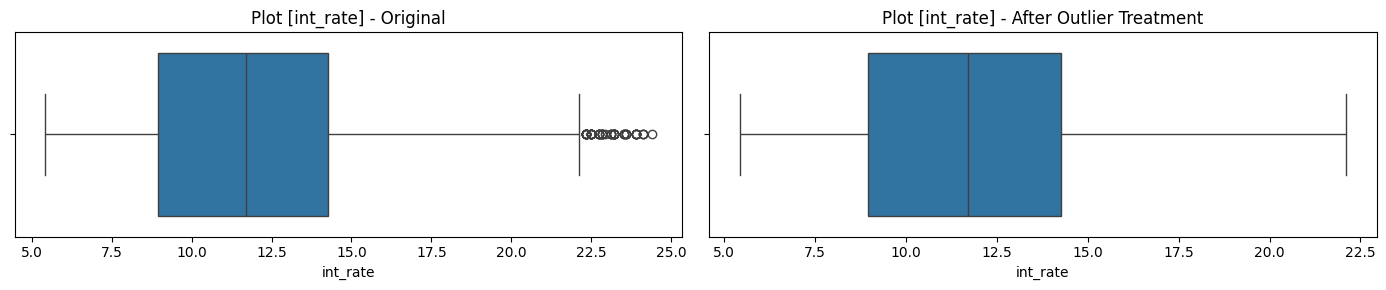

Rows dropped:  64
Percentage rows dropped:  0.19 %


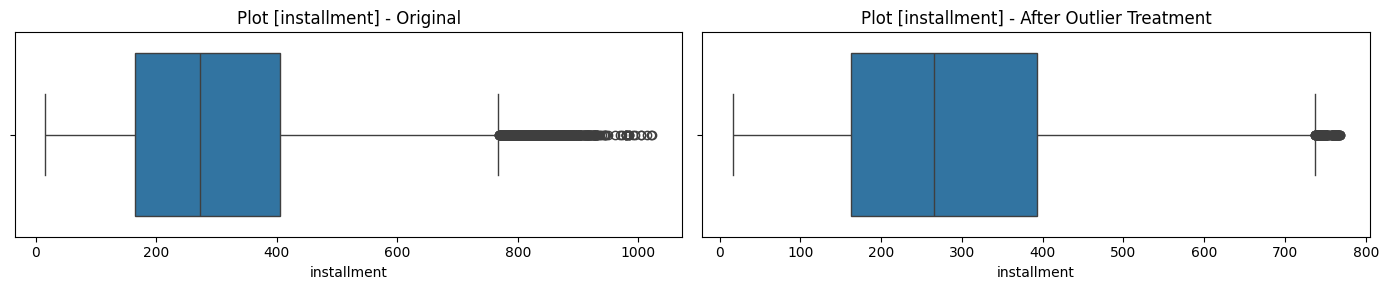

Rows dropped:  981
Percentage rows dropped:  2.85 %


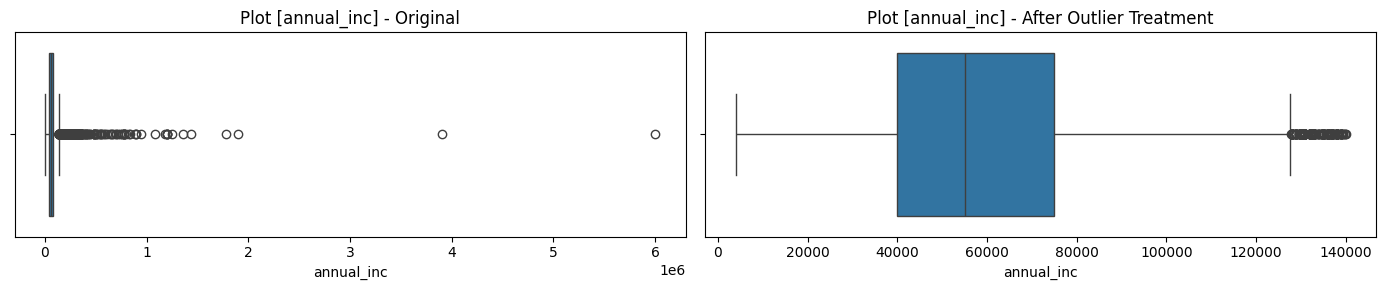

Rows dropped:  1396
Percentage rows dropped:  4.18 %


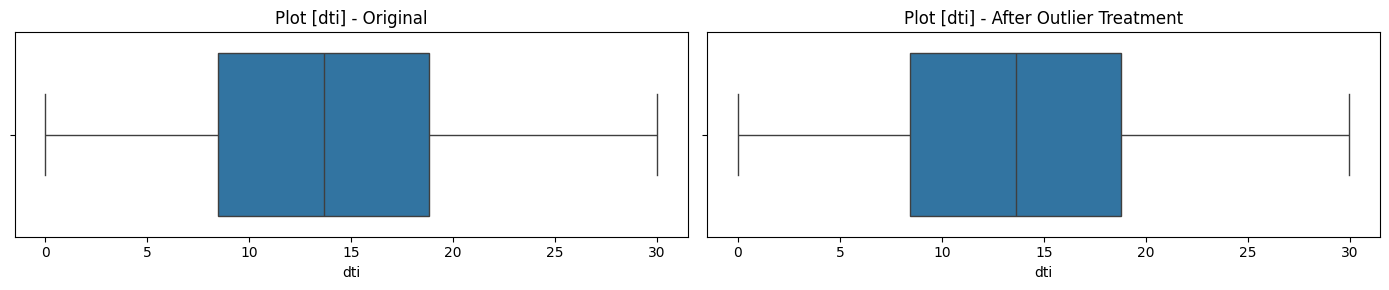

Rows dropped:  0
Percentage rows dropped:  0.0 %


In [35]:
col_outlier_treatment = ['loan_amnt', 'int_rate', 'installment', 'annual_inc','dti']
for col in col_outlier_treatment:
  outlier_comparison(loan_dataset, col)
  loan_dataset = drop_outlier(loan_dataset, col)

In [36]:
loan_dataset.shape

(32031, 35)

# **Univariate Analysis**

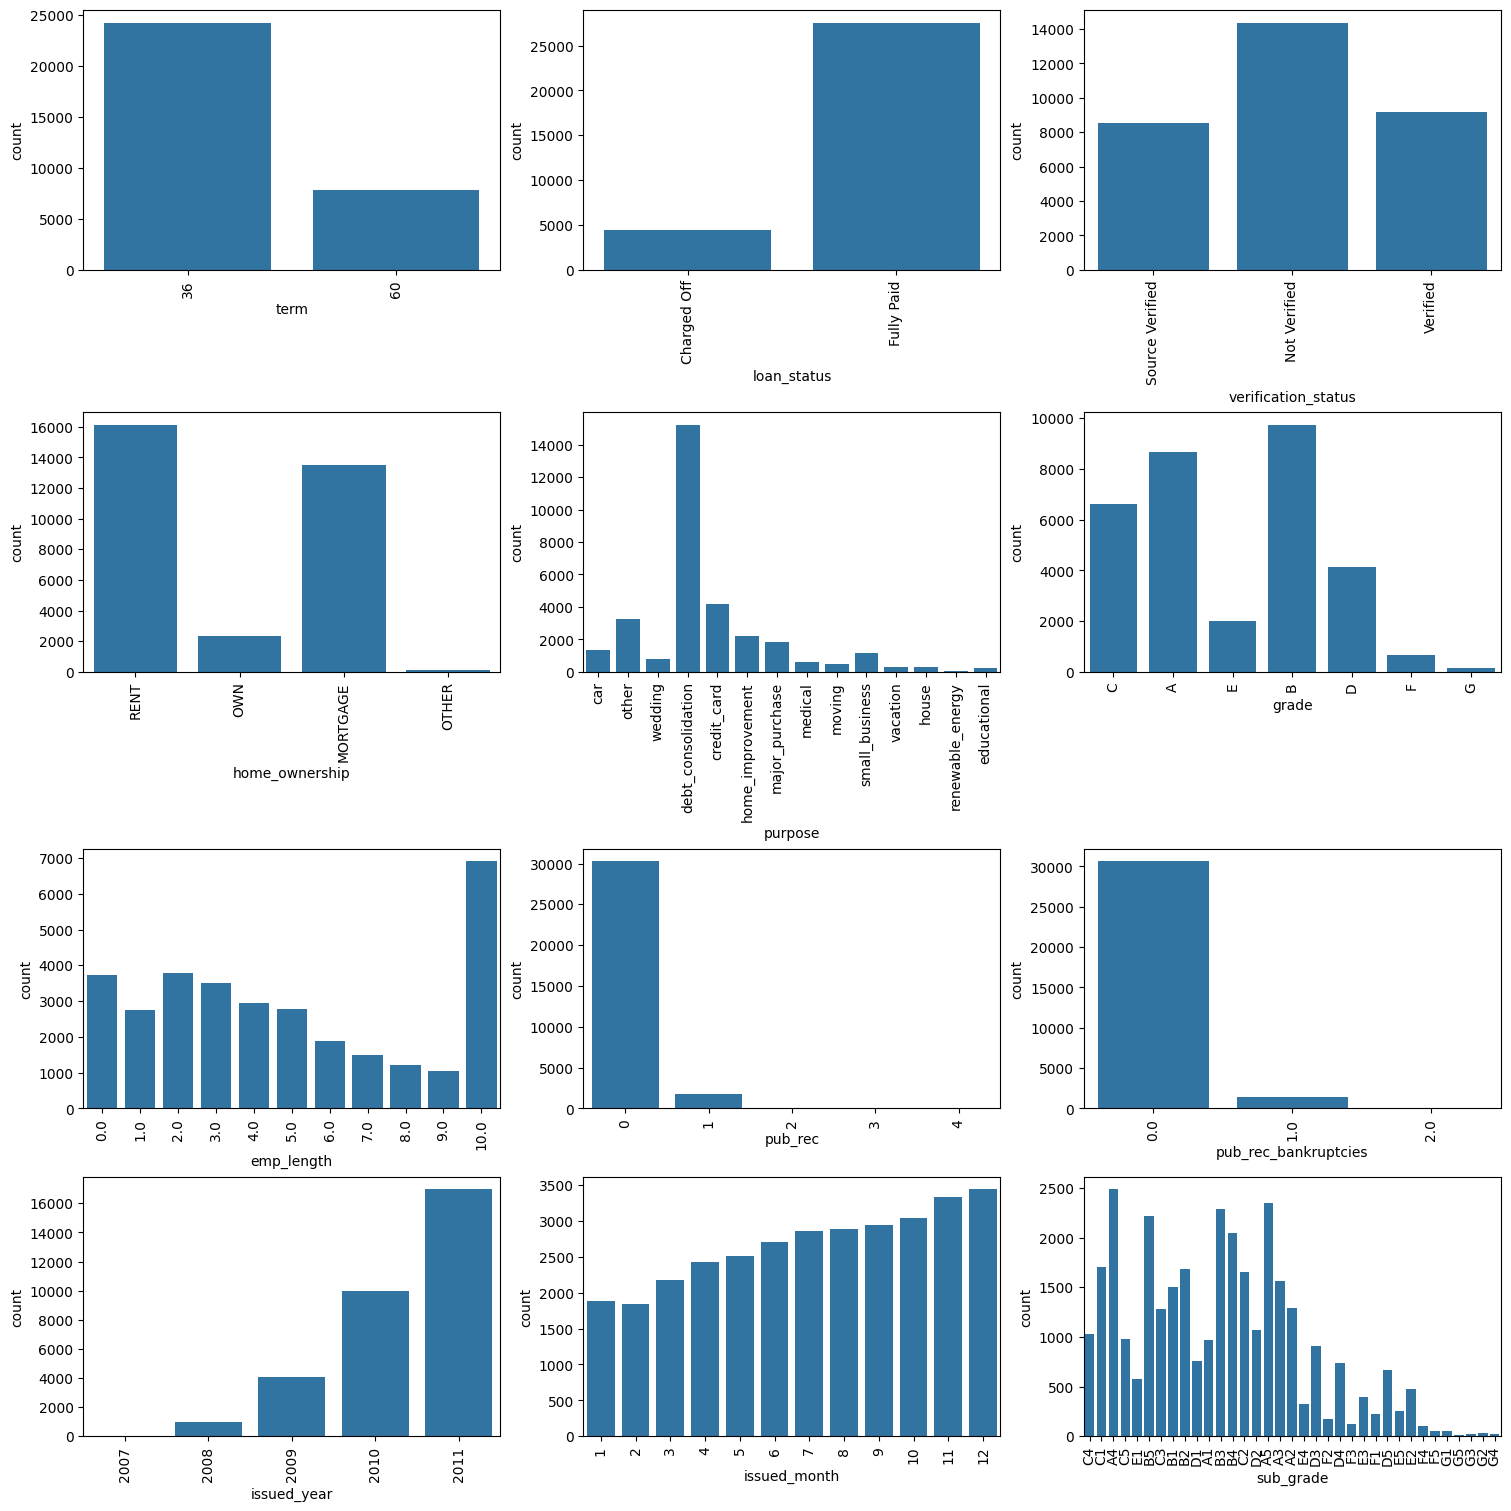

In [37]:
fig, axes = plt.subplots(int(math.ceil(len(categorical_col)/3)),3, figsize=[15, 15], constrained_layout=True)
for axis, colmn in enumerate(categorical_col):
  plot = sns.countplot(data=loan_dataset, x=colmn, ax=axes[axis//3,axis%3] )
  plt.setp(plot.get_xticklabels(), rotation=90)

In [38]:
loan_dataset[loan_dataset['loan_defaulter']==1][['recoveries', 'loan_amnt']].describe()

,recoveries,loan_amnt
count,4494.000000,4494.000000
mean,557.071484,10671.489764
std,1359.469920,6392.427698
min,0.000000,1000.000000
25%,9.422500,5081.250000
50%,164.810000,10000.000000
75%,523.277500,15000.000000
max,21810.310000,29000.000000


# **Observations**

1. Most of loan was taken for **36 months** ie. for short term.
2. Large number of **Unverified loan data** exists which can be one of the reason for increasing number of defaulters.
3. Most of the loans were issued in **December**.
4. There is continuous increase in loan disbursement every year.
5. Highest number of **B grade** type loans were given, follwed by **A grade**.
6. Highest number of loans were given to the **10+ years** employed people.
7. There are very less no. of derogatory public records.
8. There are very less no. of public records bankruptcies.
9. Median loan amount provided to the defaulters is 9800, while median recovered is about 162.79, making the percentage of unrecovered amount as 98.34%.


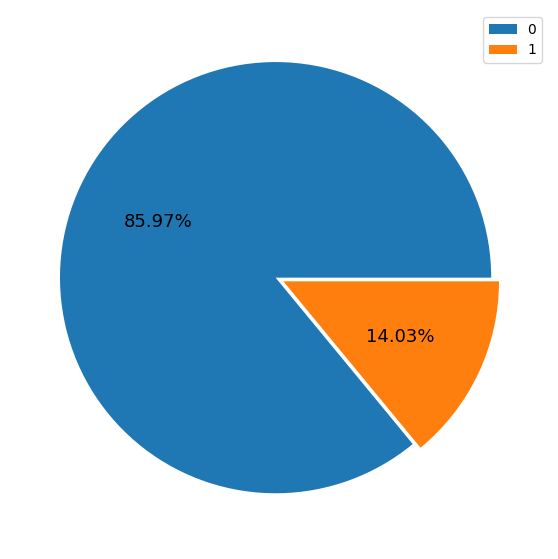

In [39]:
display_piechart('loan_defaulter')

**85.97%** of loans were fully paid whereas only **14.03%** loans were defaulted.

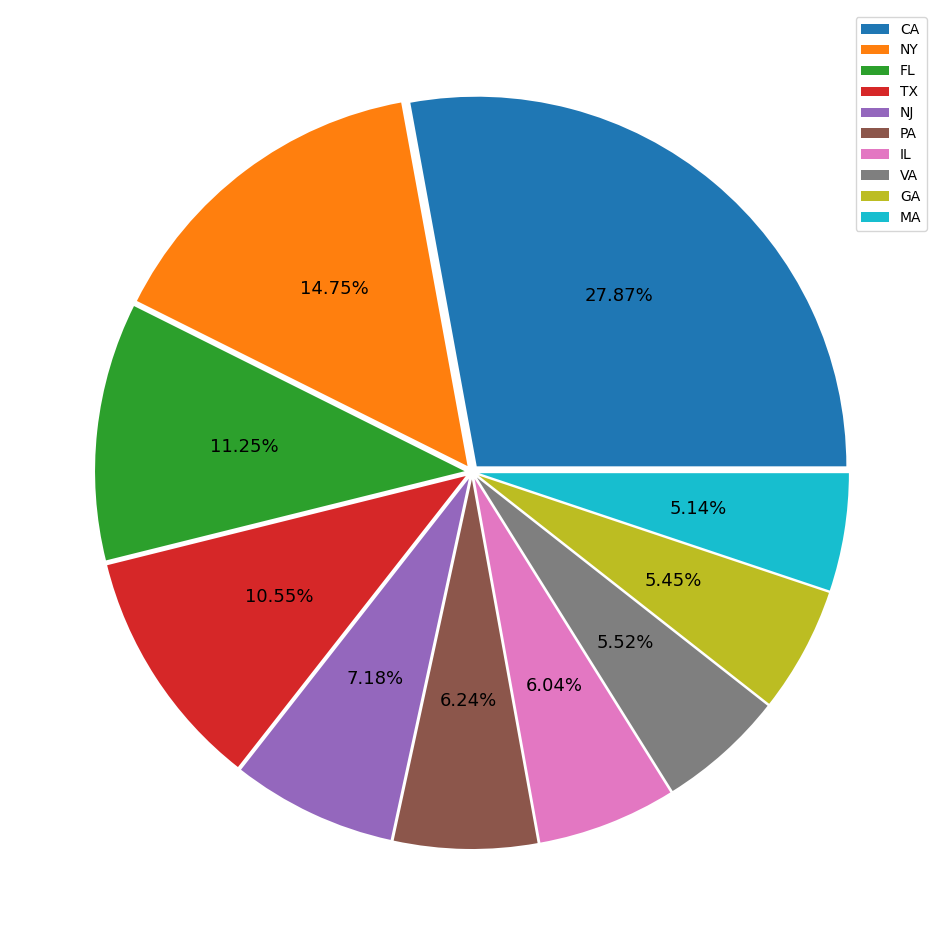

In [40]:
display_piechart('addr_state')

**Top 10 states** with highest number of loans taken.**California** state has the highest number of people who have taken loan i.e, approximately about **28%**, followed by **New York** which is approx **15%**.

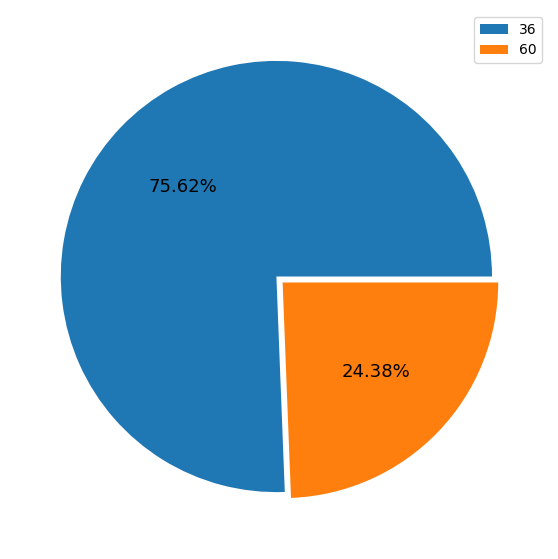

In [41]:
display_piechart('term')

Around **76%** of the loans were taken for short duration of **36 months** while remaining **24%** were taken for long duration of **60 months**.

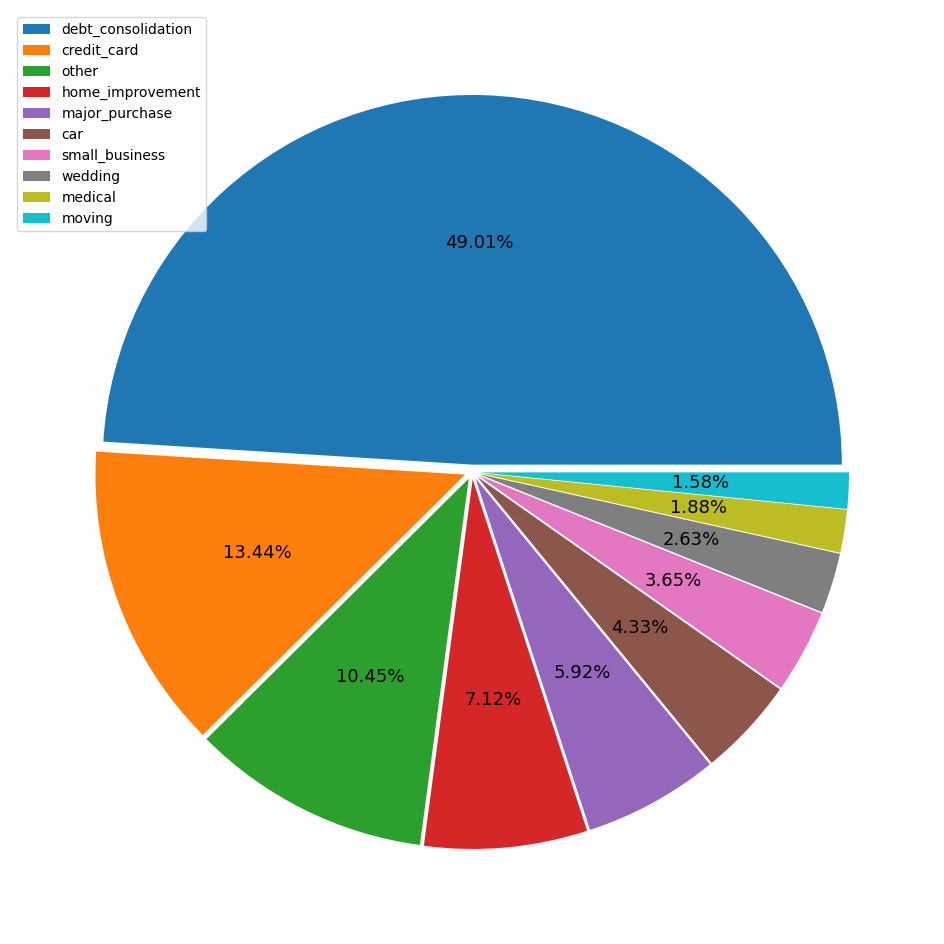

In [42]:
display_piechart('purpose')

**49%** loans were taken for **debt consolidation** which is highest among all other purposes, followed by **credit card** with **13%** loans.

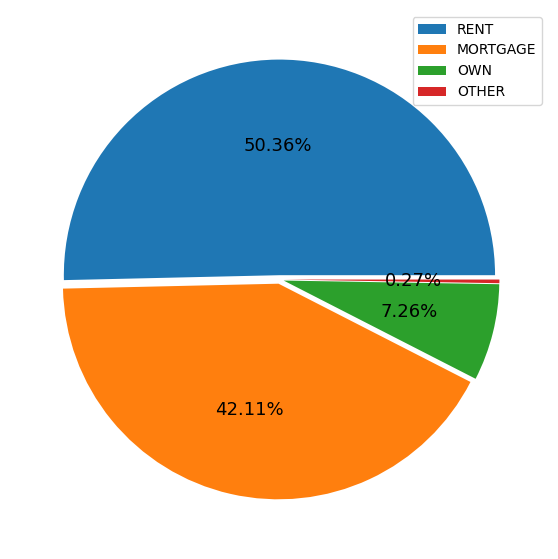

In [43]:
display_piechart('home_ownership')

About **50.36%** of loans were taken by people living in **Rented** house whereas **42.11%** loans were taken by people with **mortgage** home.

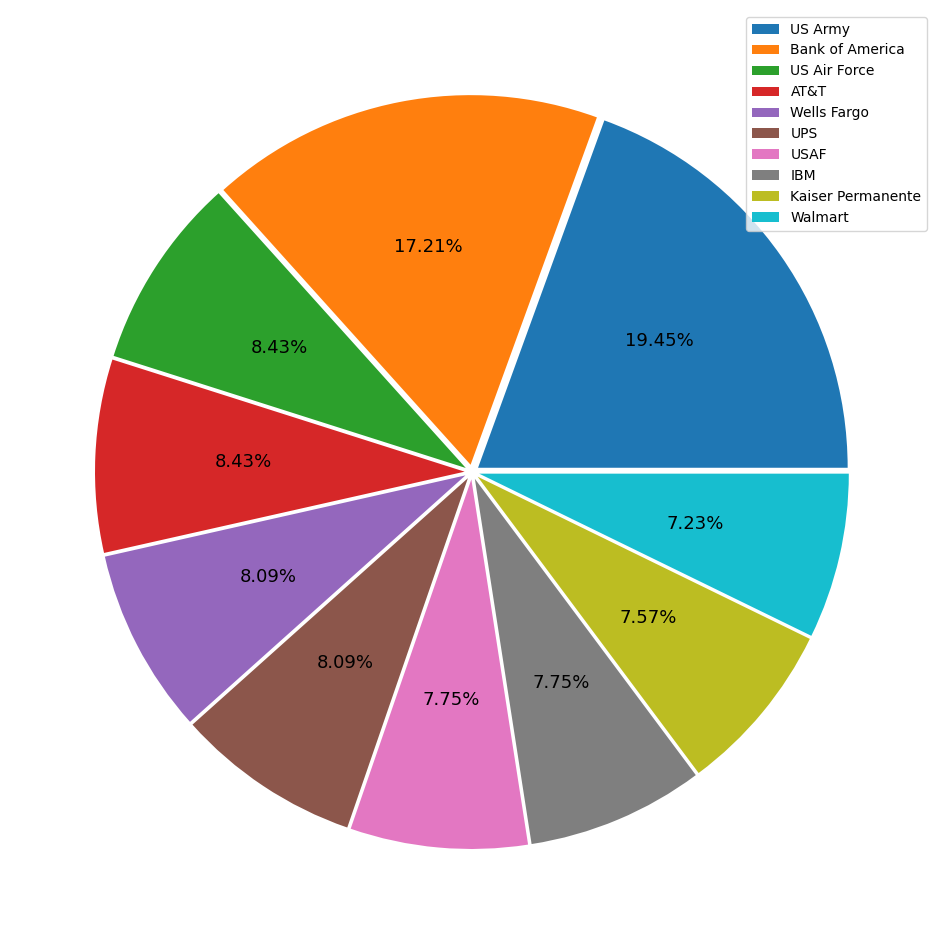

In [44]:
display_piechart('emp_title')

**Top 10 organizations** with highest number of loans.**19.45%** of loans were taken by employees working for **US Army**, followed by employees of **Bank Of America** with **17.21%**.

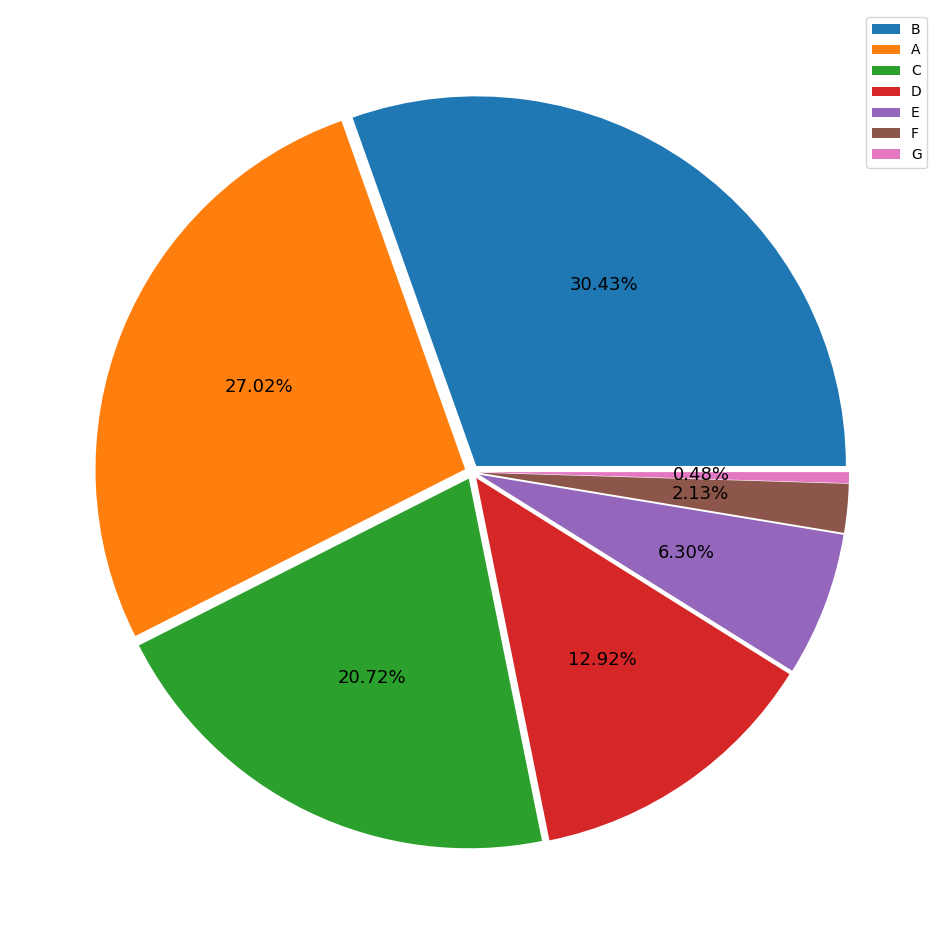

In [45]:
display_piechart('grade')

**30.43%** of loans were given under **B Grade** type, followed by **A grade** type with **27%**

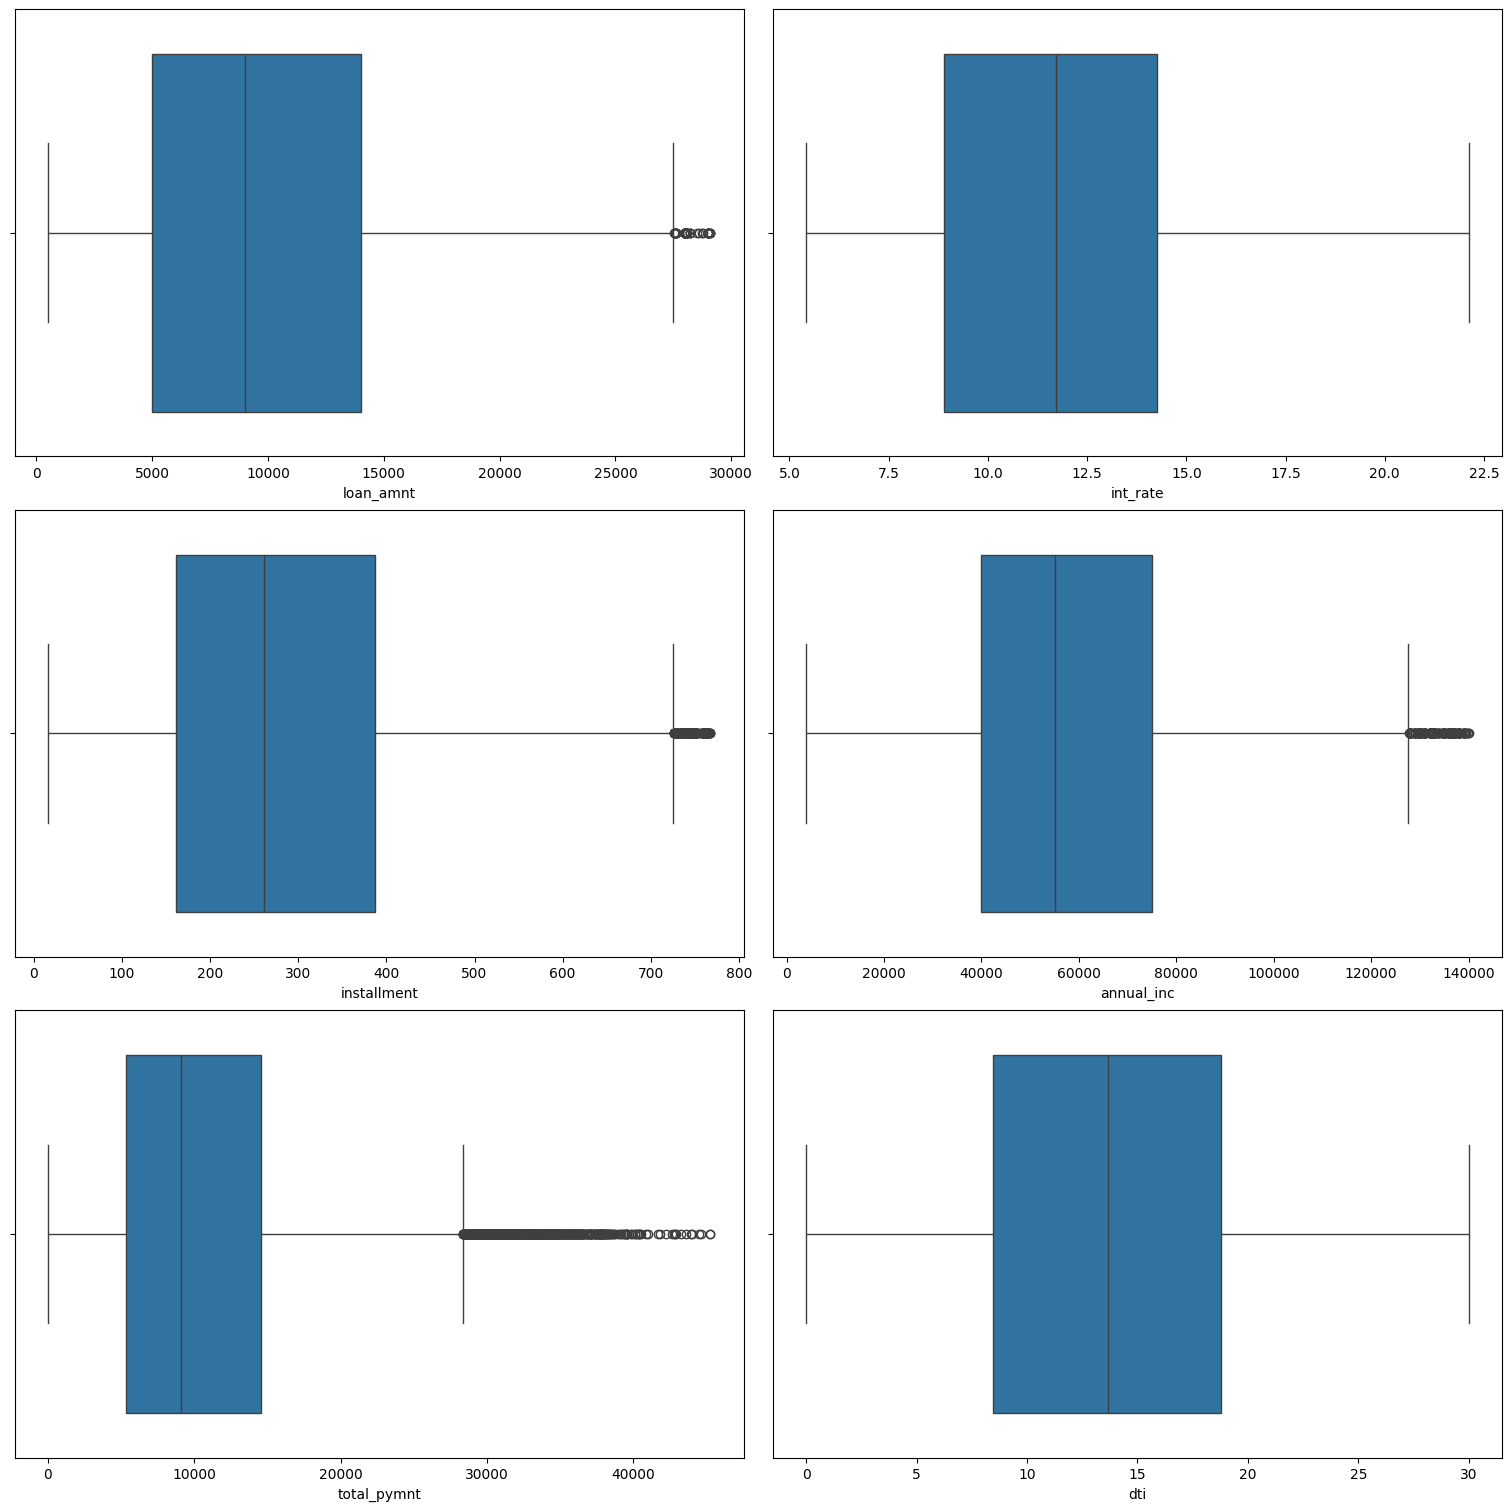

In [46]:
fig, axes = plt.subplots(int(math.ceil(len(continuous_col)/2)),2, figsize=[15, 15], constrained_layout=True)
for axis, colmn in enumerate(continuous_col):
  plot = sns.boxplot(data=loan_dataset,x=colmn, ax=axes[axis//2,axis%2] )

# **Observation**

1.   Majority of the **loan amount** was in the range of **5000 to 15000**
2.   Majority of the **annual income** ranging in between **40k to 80K**
3.   **Interest rate** was ranging between **8.5 - 15%**
4.   **Installment** ranges between **200 to 400**



# **Bivariate Analysis**

Categorical Vs Categorical

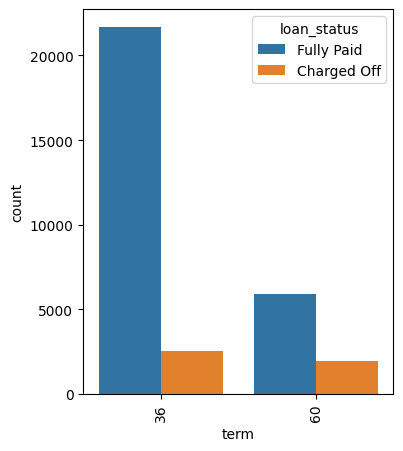

In [47]:
bivariate_analysis(loan_dataset,"term","loan_status")

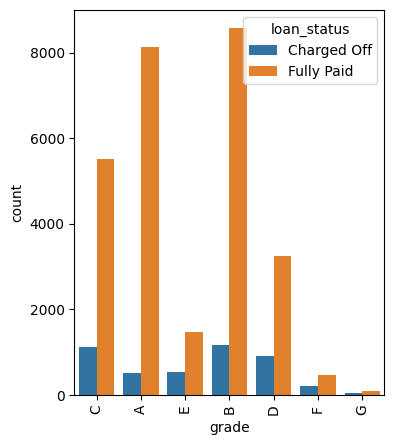

In [48]:
bivariate_analysis(loan_dataset,"grade","loan_status")

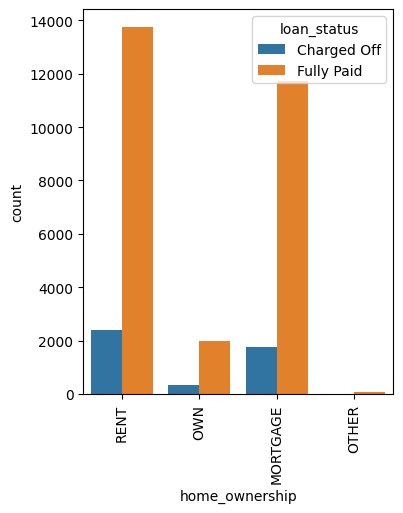

In [49]:
bivariate_analysis(loan_dataset,"home_ownership","loan_status")

People living on rent or whose house is on mortgage are likely to charge off loan in comparison to the one who owns the house.

We might need to consider other factors to draw a conclusion.

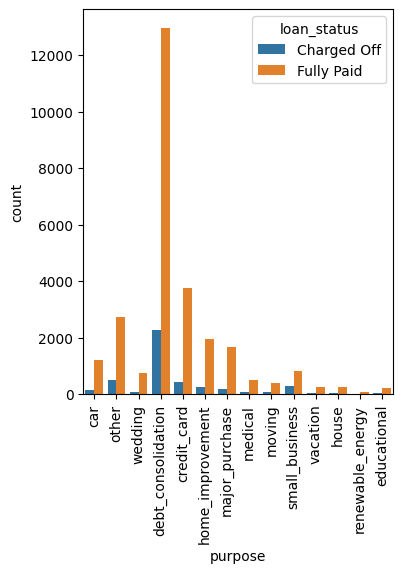

In [50]:
bivariate_analysis(loan_dataset,"purpose","loan_status")

Loan taken for debt consolidation purpose have higher chances for loan getting charged off but highest number of loans are also fully paid for same purpose.

We might need to consider other factors to draw a conclusion.

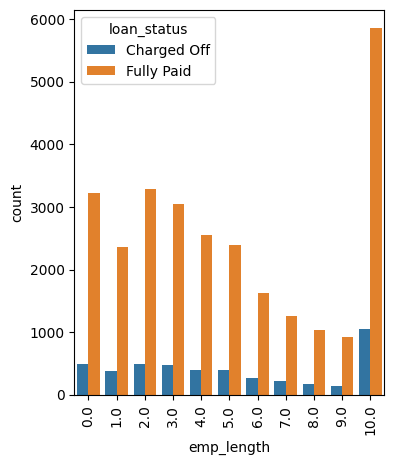

In [51]:
bivariate_analysis(loan_dataset,"emp_length","loan_status")

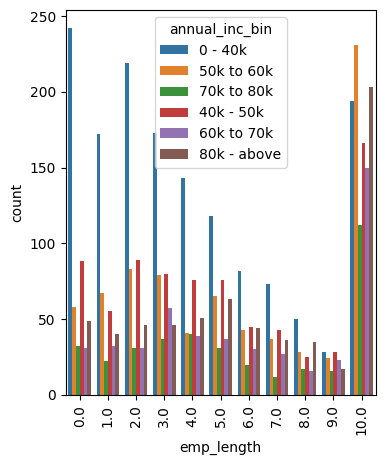

In [52]:
bivariate_analysis(loan_dataset[loan_dataset['loan_defaulter'] ==1],"emp_length","annual_inc_bin")

People who are employed for more than 10 years and having less annual income are more likely be defaulters.

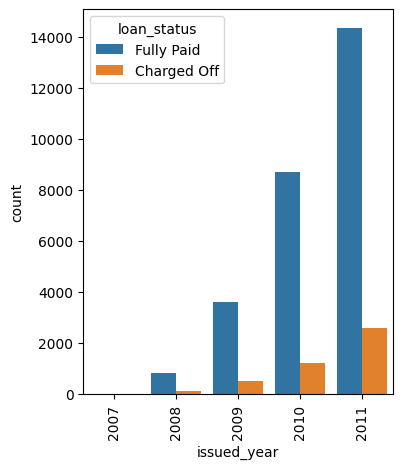

In [53]:
bivariate_analysis(loan_dataset,"issued_year","loan_status")

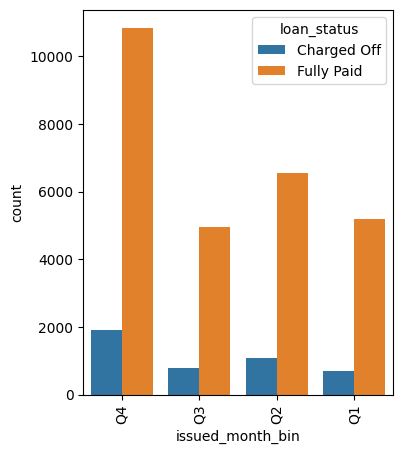

In [54]:
bivariate_analysis(loan_dataset,"issued_month_bin","loan_status")

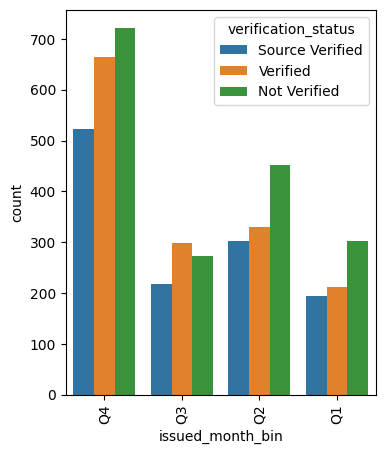

In [55]:
bivariate_analysis(loan_dataset[loan_dataset['loan_defaulter'] ==1],"issued_month_bin","verification_status")

In Q4, loan was given without verifying the details of person. It could be done to meet the year end quota. This might be one of the factor for more defaulters and making loss.

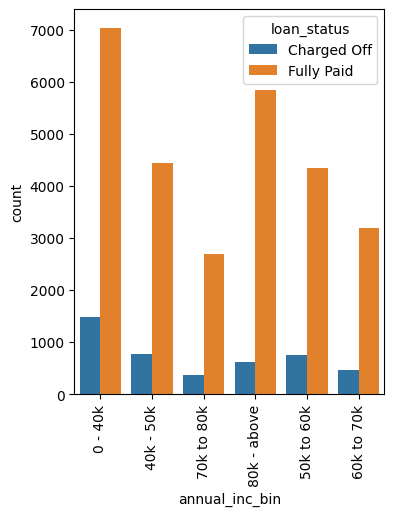

In [56]:
bivariate_analysis(loan_dataset,"annual_inc_bin","loan_status")

There are more chances of people with annual income less than 50k becoming defaulters.

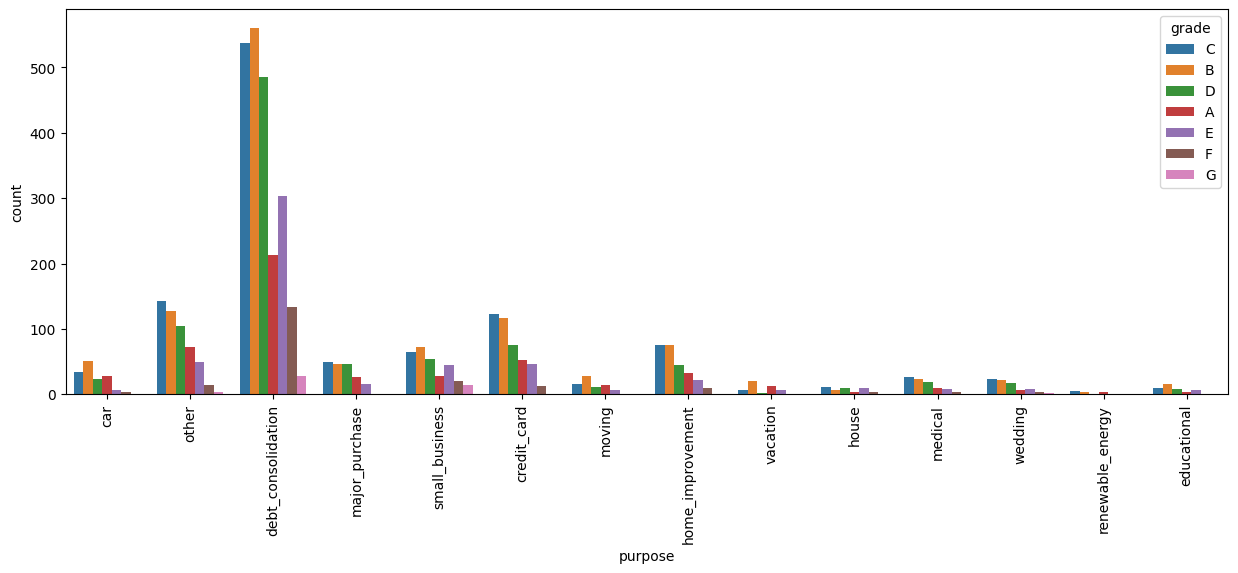

In [58]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data=loan_dataset[loan_dataset['loan_defaulter'] ==1],x="purpose",hue="grade")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

Most of the loans were provided for debt consolidtion and credit card purposes under B grade and A grade loan type.

**Numerical Vs Numerical And Numerical Vs Categorical**

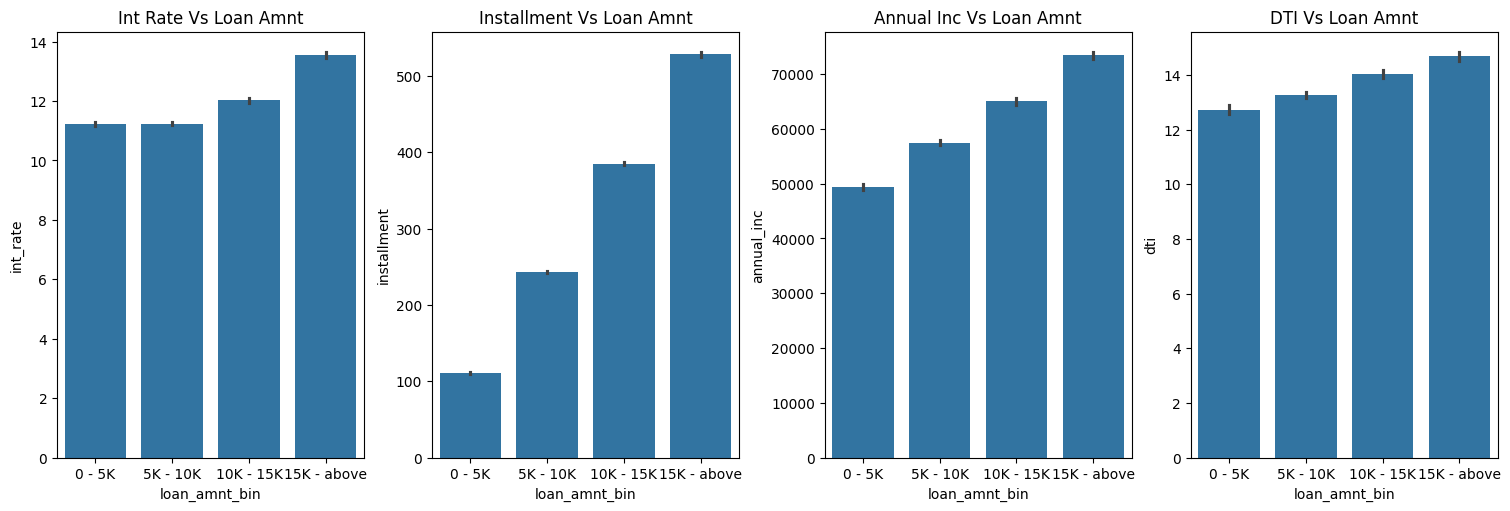

In [59]:
figure, axes = plt.subplots(1,4, figsize=[15, 5], constrained_layout=True)
sns.barplot(ax=axes[0], y='int_rate', x='loan_amnt_bin', data=loan_dataset)
axes[0].set_title('Int Rate Vs Loan Amnt')
sns.barplot(ax=axes[1], y='installment', x='loan_amnt_bin', data=loan_dataset)
axes[1].set_title('Installment Vs Loan Amnt')
sns.barplot(ax=axes[2], y='annual_inc', x='loan_amnt_bin', data=loan_dataset)
axes[2].set_title('Annual Inc Vs Loan Amnt')
sns.barplot(ax=axes[3], y='dti', x='loan_amnt_bin', data=loan_dataset)
axes[3].set_title('DTI Vs Loan Amnt')
plt.show()

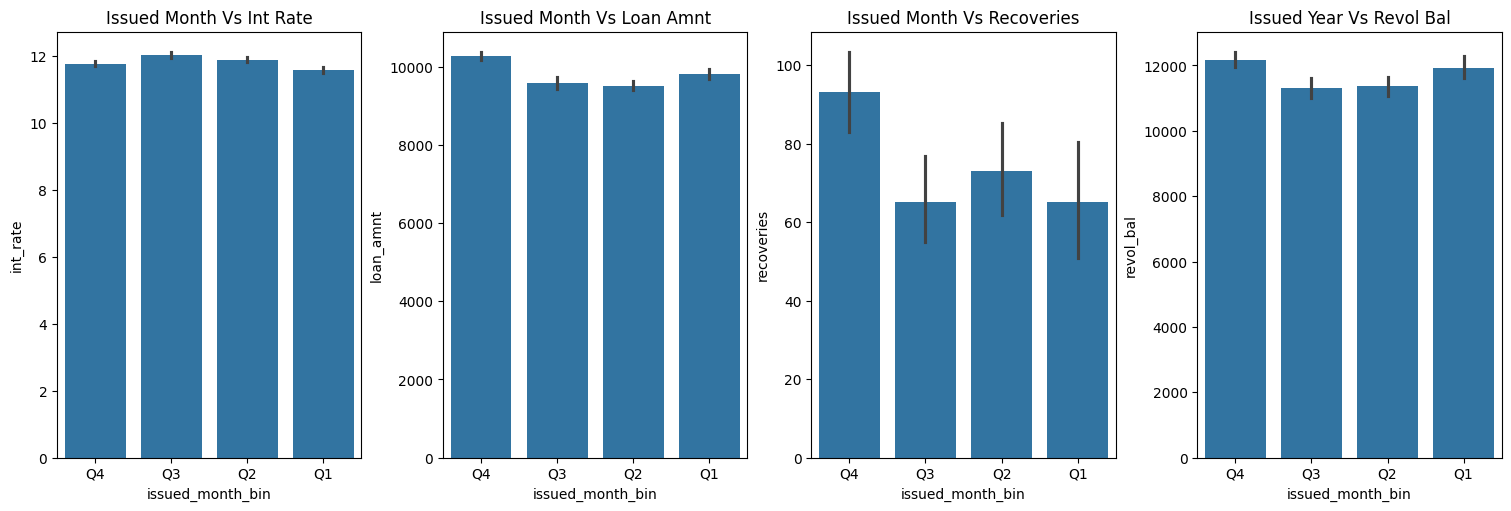

In [60]:
figure, axes = plt.subplots(1,4, figsize=[15, 5], constrained_layout=True)
sns.barplot(ax=axes[0], x='issued_month_bin', y='int_rate', data=loan_dataset)
axes[0].set_title('Issued Month Vs Int Rate')
sns.barplot(ax=axes[1], x='issued_month_bin', y='loan_amnt', data=loan_dataset)
axes[1].set_title('Issued Month Vs Loan Amnt')
sns.barplot(ax=axes[2], x='issued_month_bin', y='recoveries', data=loan_dataset)
axes[2].set_title('Issued Month Vs Recoveries')
sns.barplot(ax=axes[3], x='issued_month_bin', y='revol_bal', data=loan_dataset)
axes[3].set_title('Issued Year Vs Revol Bal')
plt.show()

Most of the loans were taken by people in Q4 or we can say in few last months before year ends.

It can also be said that to meet the sales expectation more loans were provided to people without verifying much data.

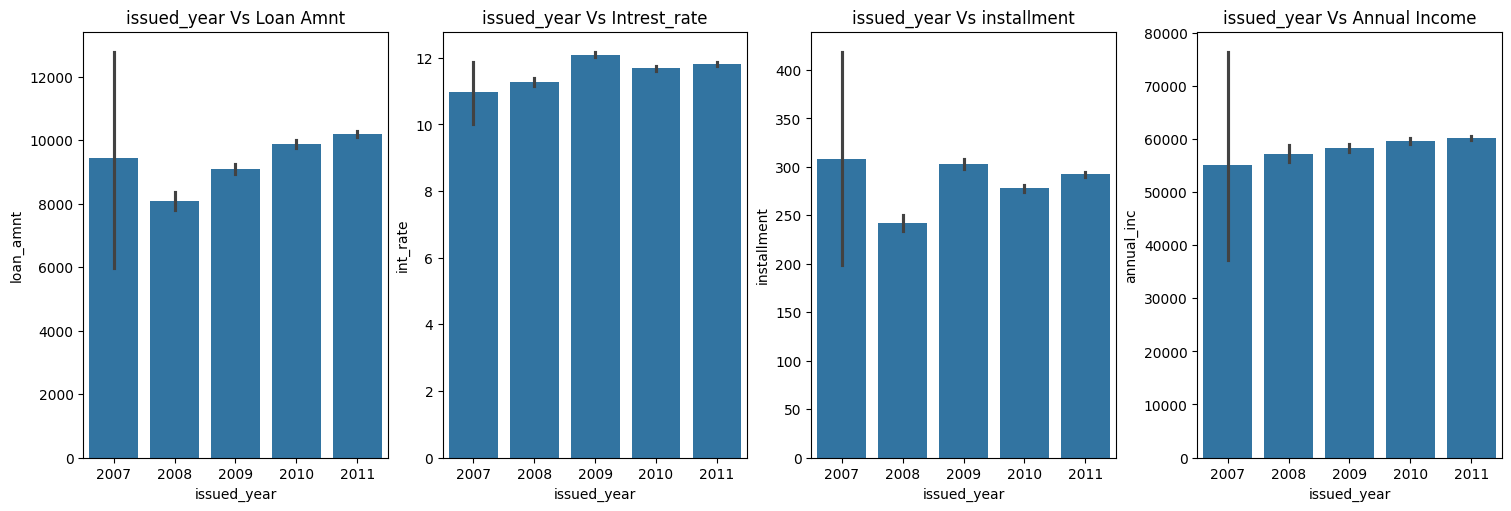

In [61]:
figure, axes = plt.subplots(1,4, figsize=[15, 5], constrained_layout=True)
sns.barplot(ax=axes[0], x='issued_year', y='loan_amnt', data=loan_dataset)
axes[0].set_title('issued_year Vs Loan Amnt')
sns.barplot(ax=axes[1], x='issued_year', y='int_rate', data=loan_dataset)
axes[1].set_title('issued_year Vs Intrest_rate')
sns.barplot(ax=axes[2], x='issued_year', y='installment', data=loan_dataset)
axes[2].set_title('issued_year Vs installment')
sns.barplot(ax=axes[3], x='issued_year', y='annual_inc', data=loan_dataset)
axes[3].set_title('issued_year Vs Annual Income')
plt.show()

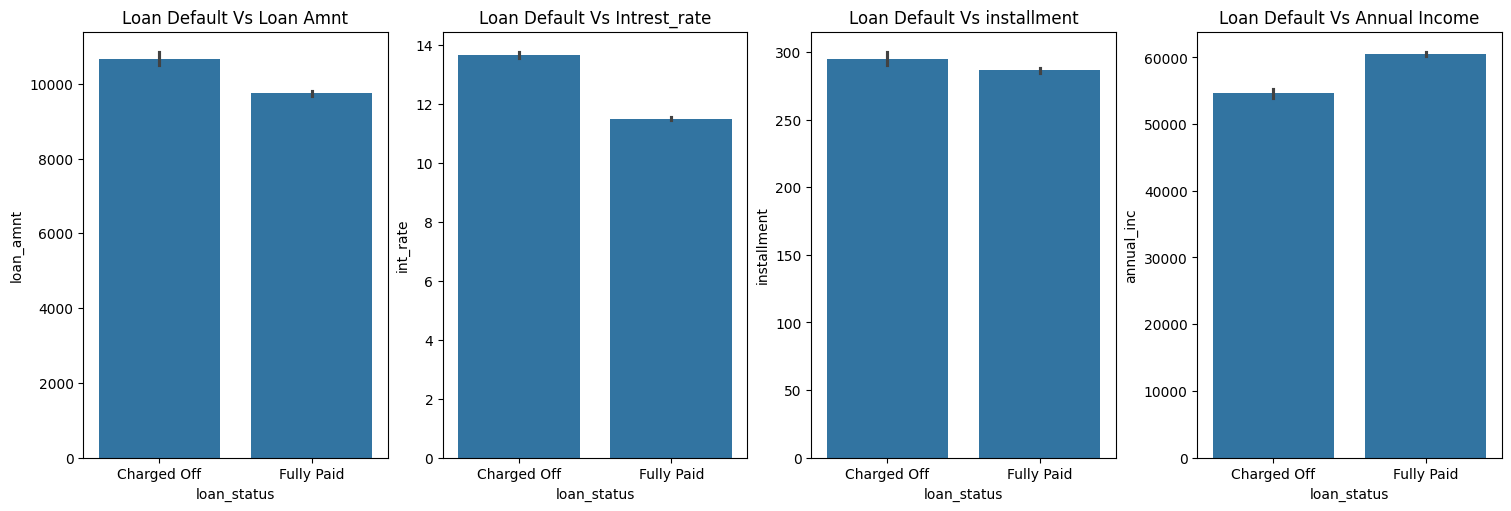

In [62]:
figure, axes = plt.subplots(1,4, figsize=[15, 5], constrained_layout=True)
sns.barplot(ax=axes[0], x='loan_status', y='loan_amnt', data=loan_dataset)
axes[0].set_title('Loan Default Vs Loan Amnt')
sns.barplot(ax=axes[1], x='loan_status', y='int_rate', data=loan_dataset)
axes[1].set_title('Loan Default Vs Intrest_rate')
sns.barplot(ax=axes[2], x='loan_status', y='installment', data=loan_dataset)
axes[2].set_title('Loan Default Vs installment')
sns.barplot(ax=axes[3], x='loan_status', y='annual_inc', data=loan_dataset)
axes[3].set_title('Loan Default Vs Annual Income')
plt.show()

# **Observation**
There is higher chances of loan getting defaulted if loan amount, interest rate or installments are higher and annual income is less.

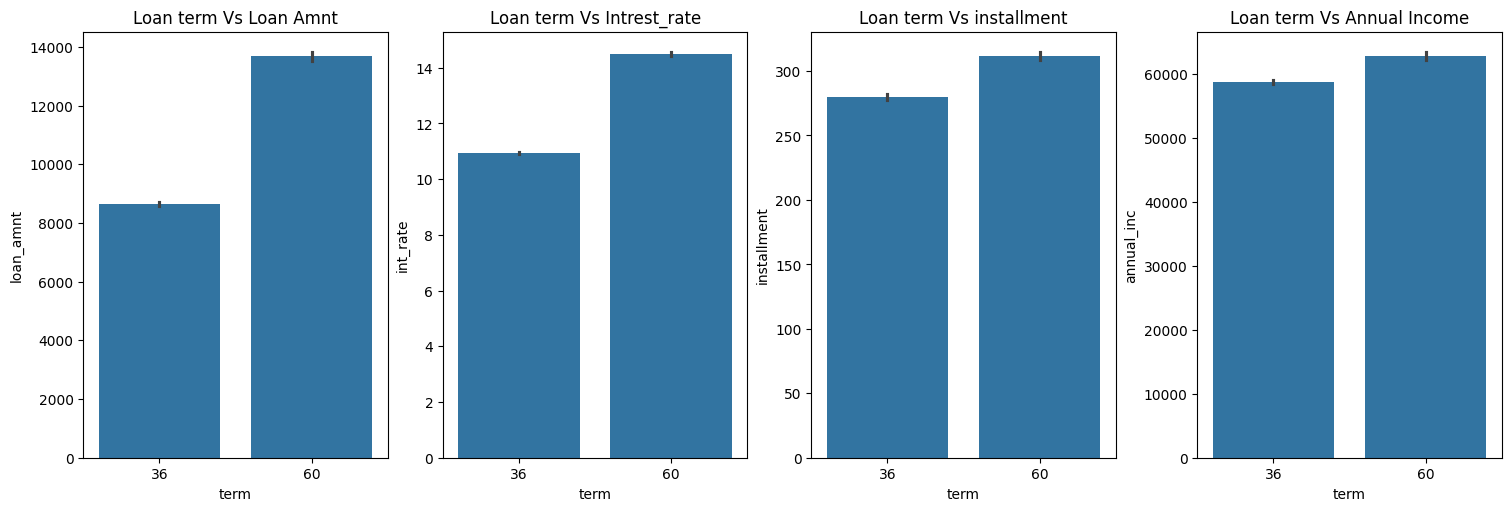

In [63]:
figure, axes = plt.subplots(1,4, figsize=[15, 5], constrained_layout=True)
sns.barplot(ax=axes[0], x='term', y='loan_amnt', data=loan_dataset)
axes[0].set_title('Loan term Vs Loan Amnt')
sns.barplot(ax=axes[1], x='term', y='int_rate', data=loan_dataset)
axes[1].set_title('Loan term Vs Intrest_rate')
sns.barplot(ax=axes[2], x='term', y='installment', data=loan_dataset)
axes[2].set_title('Loan term Vs installment')
sns.barplot(ax=axes[3], x='term', y='annual_inc', data=loan_dataset)
axes[3].set_title('Loan term Vs Annual Income')
plt.show()

Loan taken for long term of **60 months** have **higher loan amount and interest rates** than for short term.

# **MultiVariate Analysis**

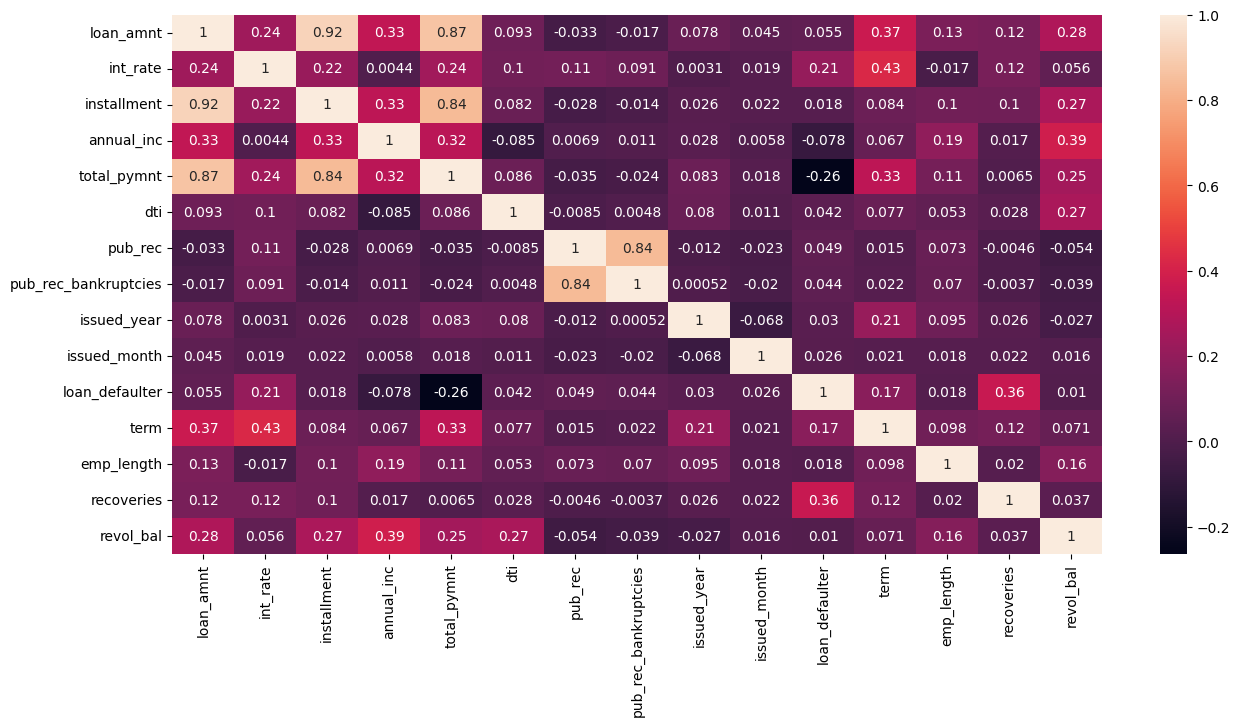

In [64]:
col = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'total_pymnt','dti','pub_rec','pub_rec_bankruptcies','issued_year','issued_month','loan_defaulter','term','emp_length','recoveries','revol_bal']
plt.figure(figsize=(15,7))
sns.heatmap(loan_dataset[col].corr(),annot=True)
plt.show()

In [65]:
# Return percentage data in pivot table
def ret_pct_data_fr_default(row_name):
  tbl = pd.pivot_table(loan_dataset, values=['loan_amnt'],
                                  index=row_name,
                                  columns=['loan_defaulter'],
                                  aggfunc=['count'], dropna=True)
  tbl['sum'] = tbl.sum(axis=1)
  tbl.columns = ['0', '1', 'sum']

  for index, row in tbl.iterrows():
    tbl.at[index, '0'] = str(round(row['0']/row['sum'] * 100, 2)) + "%"
    tbl.at[index, '1'] = str(round(row['1']/row['sum'] * 100, 2)) + "%"
  tbl.drop('sum', axis=1, inplace=True)
  return tbl

ret_pct_data_fr_default(['issued_year'])

,0,1
issued_year,,
2007,66.67%,33.33%
2008,84.89%,15.11%
2009,87.75%,12.25%
2010,87.6%,12.4%
2011,84.65%,15.35%


But when we see the percentage of defaults that have happened the trend seems to be in the other direction, where loans in the year 2007 has the highest default rate of about **33.33%**.

In [66]:
# displays the percentage of loans that were recovered from the defaulted loans.
defaulted_df = loan_dataset[loan_dataset['loan_defaulter'] ==1]
defaulted_df['not_recovered'] = defaulted_df['loan_amnt'] - defaulted_df['recoveries']
f = {'recoveries': 'median', 'loan_amnt': 'median', 'not_recovered': 'median'}
sample_df = defaulted_df.groupby(['issued_year'], as_index=False).agg(f)
sample_df['pct_loss'] = round((1- sample_df['not_recovered'] / sample_df['loan_amnt']) * 100, 2)
sample_df

,issued_year,recoveries,loan_amnt,not_recovered,pct_loss
0,2007,1107.035,12225.0,11117.965,9.06
1,2008,16.810,7500.0,7500.000,0.00
2,2009,60.100,9000.0,8049.980,10.56
3,2010,123.660,9000.0,8308.500,7.68
4,2011,224.460,10000.0,9683.525,3.16


The percentage of loan recovery of the defaulted loans is very low, usually about 10% of the total loan provided.

In [67]:
f = {'recoveries': 'median', 'loan_amnt': 'count'}
defaulted_df.groupby(['purpose'], as_index=False).agg(f)

,purpose,recoveries,loan_amnt
0,car,159.005,148
1,credit_card,213.515,430
2,debt_consolidation,166.900,2262
3,educational,92.835,44
4,home_improvement,151.010,259
5,house,242.340,44
6,major_purchase,198.550,184
7,medical,147.080,91
8,moving,115.850,77
9,other,106.310,514


**Observations:** In sectors
*  Highest recovery (median, in terms of money recovered) = renewable energy
*  Highest recovery(number of recoveries) = debt consolidation